In [53]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

# Global settings for plots
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.dpi'] = 100

We'll be playing with a dataset of Marvel superheros, connected by their co-occurrence in the comics.
Originally derived from a 2011 InfoChimps data dump. Since published elsewhere. http://syntagmatic.github.io/exposedata/marvel/

In [2]:
# Load the dataset and save it as a graph

# Here's the full edge list containing all co-occurrences of characters ever (it's big, and any analysis may take a while)
marvel_all_pairs = pd.read_csv(r'https://drive.google.com/uc?export=download&id=18ngoD8Wtl-wQTehou2zbud5VkYUiT5Iy', sep="\t")
# Here's the smaller edge list that only contains characters who co-occurred 50+ times
marvel_50plus_pairs = pd.read_csv(r'https://drive.google.com/uc?export=download&id=1U0g6_Y1iX7RnHcSRG8r698wwV77w-9BC', sep="\t")
# And here's an even smaller one with only characters who have appeared together 250+ times
marvel_250plus_pairs = marvel_50plus_pairs[marvel_50plus_pairs["Co-Featured"] > 250] 


In [3]:
# Helper method that converts the edges tables from the files into a NetworkX graph
def marvel_pairs_to_graph(input_nodes):
    new_graph = nx.Graph()
    for row in input_nodes.iterrows(): 
        new_graph.add_node(row[1][0]) # Add the first character
        new_graph.add_node(row[1][1]) # Add the second character
        new_graph.add_edge(row[1][0],row[1][1],cofeatured=row[1][2])
    return new_graph

In [14]:
# Create a graph for the 250+ 
marvel_250plus_graph = marvel_pairs_to_graph(marvel_250plus_pairs)
# Create a graph for the 50+
marvel_50plus_graph = marvel_pairs_to_graph(marvel_50plus_pairs)
# Create a graph for the all pairs
marvel_all_pairs_graph = marvel_pairs_to_graph(marvel_all_pairs)

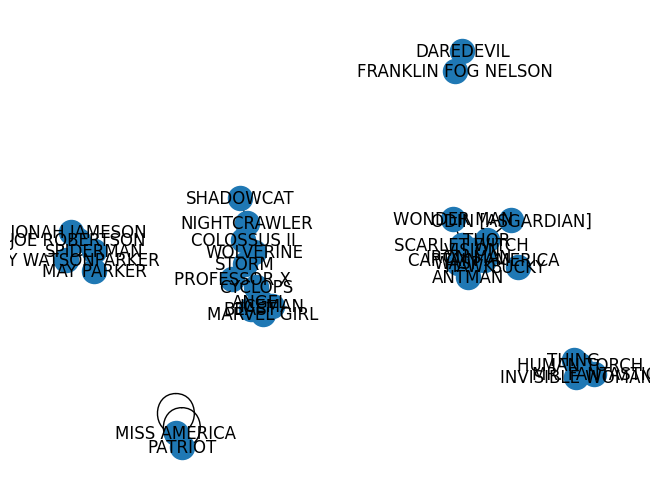

In [5]:
# Draw the graph
nx.draw(marvel_250plus_graph, with_labels=True)

In [6]:
# Calculating measures of centrality (Remember that you can use Pandas and NetworkX together).
degree_centrality_250plus = pd.DataFrame(list(nx.degree_centrality(marvel_250plus_graph).items()))
degree_centrality_250plus.sort_values(1,ascending=False).head(10)

,0,1
6,CAPTAIN AMERICA,0.235294
2,CYCLOPS,0.205882
8,IRON MAN,0.205882
11,SCARLET WITCH,0.205882
7,HAWK,0.176471
9,WASP,0.176471
13,VISION,0.176471
12,THOR,0.147059
0,ANGEL,0.117647
27,SPIDERMAN,0.117647


In [7]:
# NetworkX also lets you do cool things like find shortest paths in the graph.
# (hint - it also has methods for slicing graphs in lots of other useful ways.
#  Be sure to have a look at the docs! )
nx.shortest_path(marvel_250plus_graph, 'SHADOWCAT','MARVEL GIRL')

['SHADOWCAT', 'NIGHTCRAWLER', 'WOLVERINE', 'CYCLOPS', 'MARVEL GIRL']

# Datathon Questions

**Question 1.** (Using the whole Marvel-50plus dataset)  
**(A)** Who is the most central Marvel character using:
- Degree-centrality?  
- Betweenness-centrality?
- Using closeness-centrality?
- Using eigenvector-centrality?

**(B)** What character has appeared with the *largest number of other characters* (in this dataset)? 

**(C)** What character has appeared the *most total co-occurrences with all other characters* (in this dataset)? 

**(D)** Can you explain any differences between these measures?

In [8]:
# Question 1
# (A) Who is the most central Marvel character using:
# - Degree-centrality?
# Calculate degree centrality
degree_centrality_50plus = pd.DataFrame(list(nx.degree_centrality(marvel_50plus_graph).items()))
# Sort by centrality
degree_centrality_50plus.sort_values(1,ascending=False).head(10)

,0,1
11,CAPTAIN AMERICA,0.238095
30,SPIDERMAN,0.186508
38,IRON MAN,0.166667
3,THING,0.158730
44,THOR,0.146825
10,BEAST,0.146825
1,HUMAN TORCH,0.142857
25,WOLVERINE,0.134921
6,MR. FANTASTIC,0.130952
47,VISION,0.130952


In [9]:
# - Betweenness-centrality?
# Calculate betweenness centrality
betweenness_centrality_50plus = pd.DataFrame(list(nx.betweenness_centrality(marvel_50plus_graph).items()))
# Sort by centrality
betweenness_centrality_50plus.sort_values(1,ascending=False).head(10)

,0,1
30,SPIDERMAN,0.176104
11,CAPTAIN AMERICA,0.159657
44,THOR,0.078657
10,BEAST,0.075445
38,IRON MAN,0.073256
25,WOLVERINE,0.069521
103,HULK,0.057822
3,THING,0.056129
8,DR. STRANGE,0.050539
13,CYCLOPS,0.049349


In [10]:
# - Using closeness-centrality?
# Calculate closeness centrality
closeness_centrality_50plus = pd.DataFrame(list(nx.closeness_centrality(marvel_50plus_graph).items()))
# Sort by centrality
closeness_centrality_50plus.sort_values(1,ascending=False).head(10)

,0,1
11,CAPTAIN AMERICA,0.445597
3,THING,0.418689
30,SPIDERMAN,0.416676
1,HUMAN TORCH,0.414683
10,BEAST,0.410752
6,MR. FANTASTIC,0.404994
103,HULK,0.402175
38,IRON MAN,0.400317
2,INVISIBLE WOMAN,0.395747
25,WOLVERINE,0.392166


In [11]:
# - Using eigenvector-centrality?
# Calculate eigenvector centrality
eigenvector_centrality_50plus = pd.DataFrame(list(nx.eigenvector_centrality(marvel_50plus_graph).items()))
# Sort by centrality
eigenvector_centrality_50plus.sort_values(1,ascending=False).head(10)

,0,1
11,CAPTAIN AMERICA,0.278718
3,THING,0.219767
38,IRON MAN,0.215652
47,VISION,0.214439
41,SCARLET WITCH,0.211874
1,HUMAN TORCH,0.208761
10,BEAST,0.207991
48,WASP,0.205665
6,MR. FANTASTIC,0.202299
44,THOR,0.197797


In [31]:
# (B) What character has appeared with the largest number of other characters (in this dataset)?
# Calculate the number of co-occurrences for each character
cooccurrences_50plus = pd.DataFrame(list(marvel_50plus_graph.degree()), columns=['Character', 'Co-occurrences'])
# Sort by number of co-occurrences
cooccurrences_50plus.sort_values('Co-occurrences',ascending=False).head(10)

,Character,Co-occurrences
11,CAPTAIN AMERICA,60
30,SPIDERMAN,47
38,IRON MAN,42
3,THING,40
44,THOR,37
10,BEAST,37
1,HUMAN TORCH,36
25,WOLVERINE,34
6,MR. FANTASTIC,33
47,VISION,33


In [32]:
# (C) What character has appeared the most total co-occurrences with all other characters (in this dataset)?
# Calculate the number of co-occurrences for each character
cooccurrences_50plus = pd.DataFrame(list(marvel_50plus_graph.degree(weight='cofeatured')), columns=['Character', 'Co-occurrences'])
# Sort by number of co-occurrences
cooccurrences_50plus.sort_values('Co-occurrences',ascending=False).head(10)

,Character,Co-occurrences
11,CAPTAIN AMERICA,8355
30,SPIDERMAN,5934
38,IRON MAN,5705
44,THOR,5527
3,THING,5359
1,HUMAN TORCH,5058
6,MR. FANTASTIC,4775
41,SCARLET WITCH,4677
188,PATRIOT,4660
47,VISION,4617


# (D) Can you explain any differences between these measures?
The difference between these measures is that they are all different ways of calculating centrality. Degree centrality is the number of connections a node has, betweenness centrality is the number of shortest paths that pass through a node, closeness centrality is the inverse of the sum of the distances from a node to all other nodes, and eigenvector centrality is the sum of the centrality of the nodes that are connected to a node.

The difference between the most central character and the character with the most co-occurrences is that the most central character is the character that is most connected to other characters, while the character with the most co-occurrences is the character that has appeared with the most other characters.

**Question 2.** 

**(A)** What is the largest connected component in the Marvel_250plus graph? What fraction of the characters in the dataset does it contain?

**(B)** What about the largest connected component in the Marvel_50plus graph?

**(C)** What about the largest connected component in the Marvel_AllPairs graph? *(This may take a while!)*

**(D)** Can you explain the difference?

In [12]:
# Question 2
# (A) What is the largest connected component in the Marvel_250plus graph? What fraction of the characters in the dataset does it contain?
# Find the largest connected component
largest_cc_250plus = max(nx.connected_components(marvel_250plus_graph), key=len)
# Calculate the fraction of characters in the largest connected component
len(largest_cc_250plus)/len(marvel_250plus_graph.nodes())

0.3142857142857143

In [13]:
# (B) What about the largest connected component in the Marvel_50plus graph?
# Find the largest connected component
largest_cc_50plus = max(nx.connected_components(marvel_50plus_graph), key=len)
# Calculate the fraction of characters in the largest connected component
len(largest_cc_50plus)/len(marvel_50plus_graph.nodes())

0.8300395256916996

In [15]:
# (C) What about the largest connected component in the Marvel_AllPairs graph? (This may take a while!)
# Find the largest connected component
largest_cc_allpairs = max(nx.connected_components(marvel_all_pairs_graph), key=len)
# Calculate the fraction of characters in the largest connected component
len(largest_cc_allpairs)/len(marvel_all_pairs_graph.nodes())

0.99719232569022

**Answer to Question 2 (D)**:
The difference is that the Marvel_AllPairs graph is a complete graph, so the largest connected component is the entire graph. The Marvel_50plus graph and the Marvel_250plus graph are sub-graphs, so the largest connected component is not the entire graph.

**Question 3.** Take the *largest connected component of Marvel-50plus graph* (which you should have found in Question 2) and divide into communities using at least two community detection algorithms and plot them. Which community-detection algorithm and parameters gives you the most satisfying split?

The networkx library provides several community detection algorithms, including:
`greedy_modularity_communities`: a greedy algorithm that maximizes the modularity score
`asyn_fluidc`: an asynchronous version of the Fluid Communities algorithm
`label_propagation_communities`: a label propagation algorithm
`kernighan_lin_bisection`: the Kernighan-Lin algorithm for bisection
`edge_betweenness_communities`: a community detection algorithm based on edge betweenness centrality
`louvain_communities`: the Louvain algorithm for community detection

There are several metrics that can be used to evaluate the quality of the communities, such as _modularity, conductance, normalized cut, or silhouette score_. You can choose the algorithm and its parameters that produce the highest value of your desired evaluation metric, or you can visually inspect the communities and choose the algorithm and parameters that produce the most visually coherent and distinct communities.

The _modularity score_ is a value between -1 and 1 that measures the quality of the communities. A high modularity score indicates that the communities are well separated from one another and have a high density of connections within the communities.

In [17]:
# Question 3
# Take the largest connected component of Marvel-50plus graph
largest_cc_50plus_graph = marvel_50plus_graph.subgraph(largest_cc_50plus)

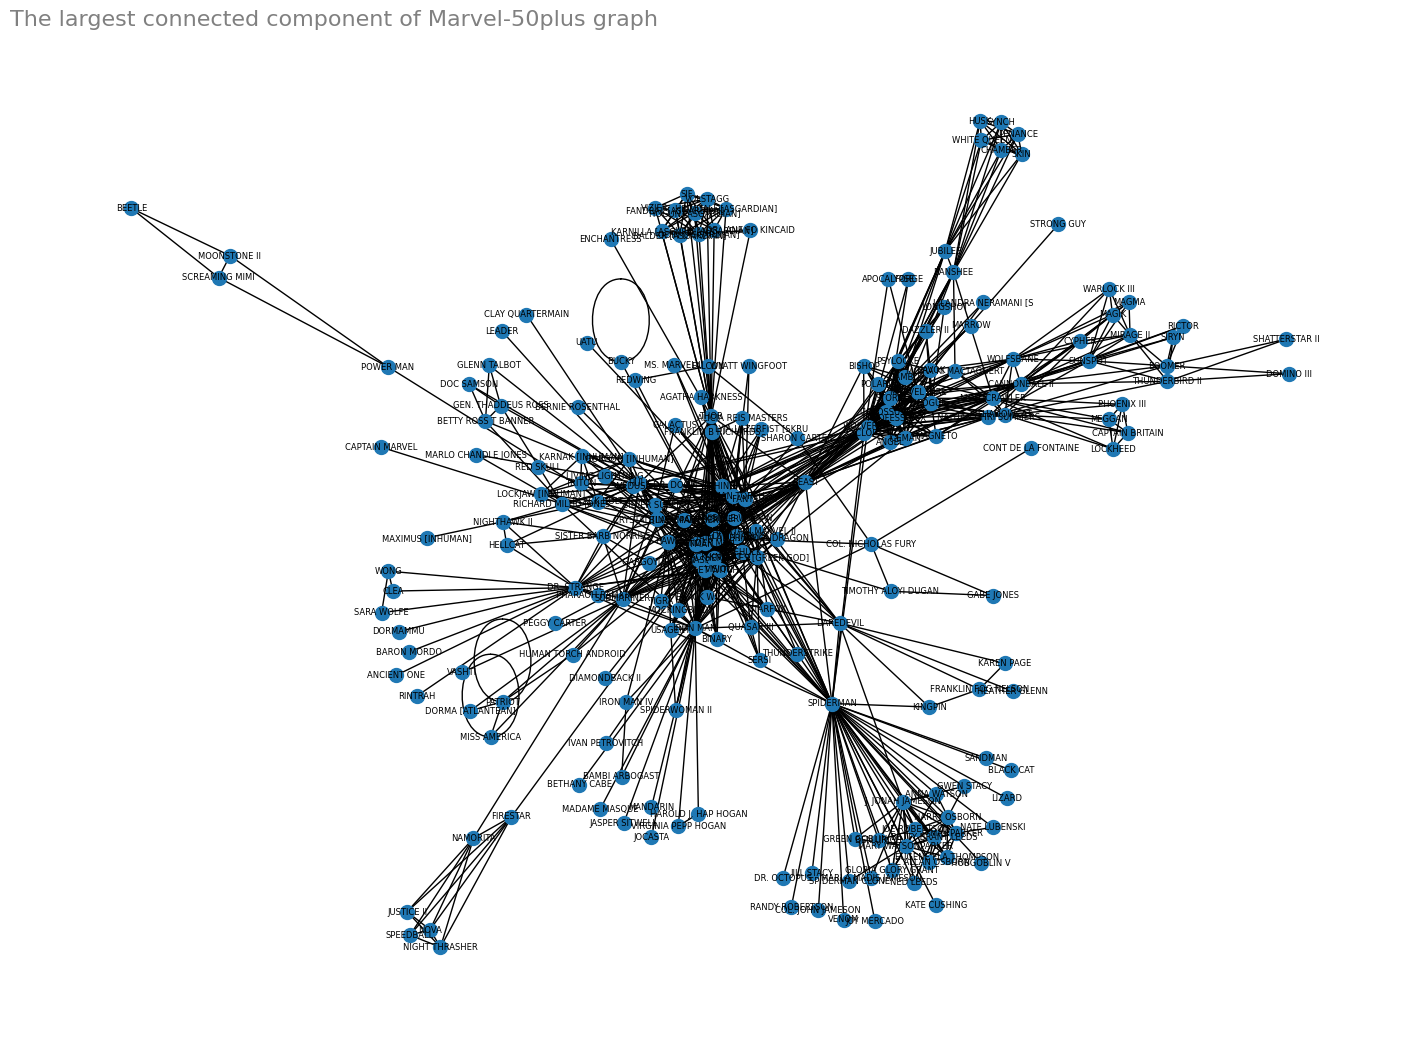

In [87]:
# Divide into communities using at least two community detection algorithms and plot them.
# Which community-detection algorithm and parameters gives you the most satisfying split?
# Plot the graph
nx.draw(largest_cc_50plus_graph, with_labels=True, node_size=100, font_size=6)
# Add a title in the upper left corner
plt.title('The largest connected component of Marvel-50plus graph', loc='left', color='grey', fontsize=16)
# Change color of the title
plt.show()

In [73]:
# Helper function to plot the communities
def plot_community_graph(graph, communities):
    import matplotlib.cm as cm

    # Create a mapping from nodes to communities
    node_to_community = {node: i for i, community in enumerate(communities) for node in community}

    # Create a list of colors for each node
    n_communities = len(communities)
    colors = cm.rainbow(np.linspace(0, 1, n_communities))
    node_colors = [colors[node_to_community[node]] for node in graph.nodes()]

    # Calculate the degree centrality of each node
    degree_centrality = nx.degree_centrality(graph)

    # Draw the nodes proportional to their degree centrality.
    node_sizes = [v * 1000 for v in degree_centrality.values()]
    nx.draw(graph, with_labels=False, node_color=node_colors, node_size=node_sizes, font_size=6, edge_color='grey', width=0.1)


In [74]:
from networkx.algorithms import community

# Modularity maximization
# Calculate the communities
communities = community.greedy_modularity_communities(largest_cc_50plus_graph)
# Calculate the modularity score
modularity_score = community.modularity(largest_cc_50plus_graph, communities)
print('Modularity score:', modularity_score)
# Calculate the number of communities
n_communities = len(communities)
print('Number of communities:', n_communities)

Modularity score: 0.5568718088373469
Number of communities: 12


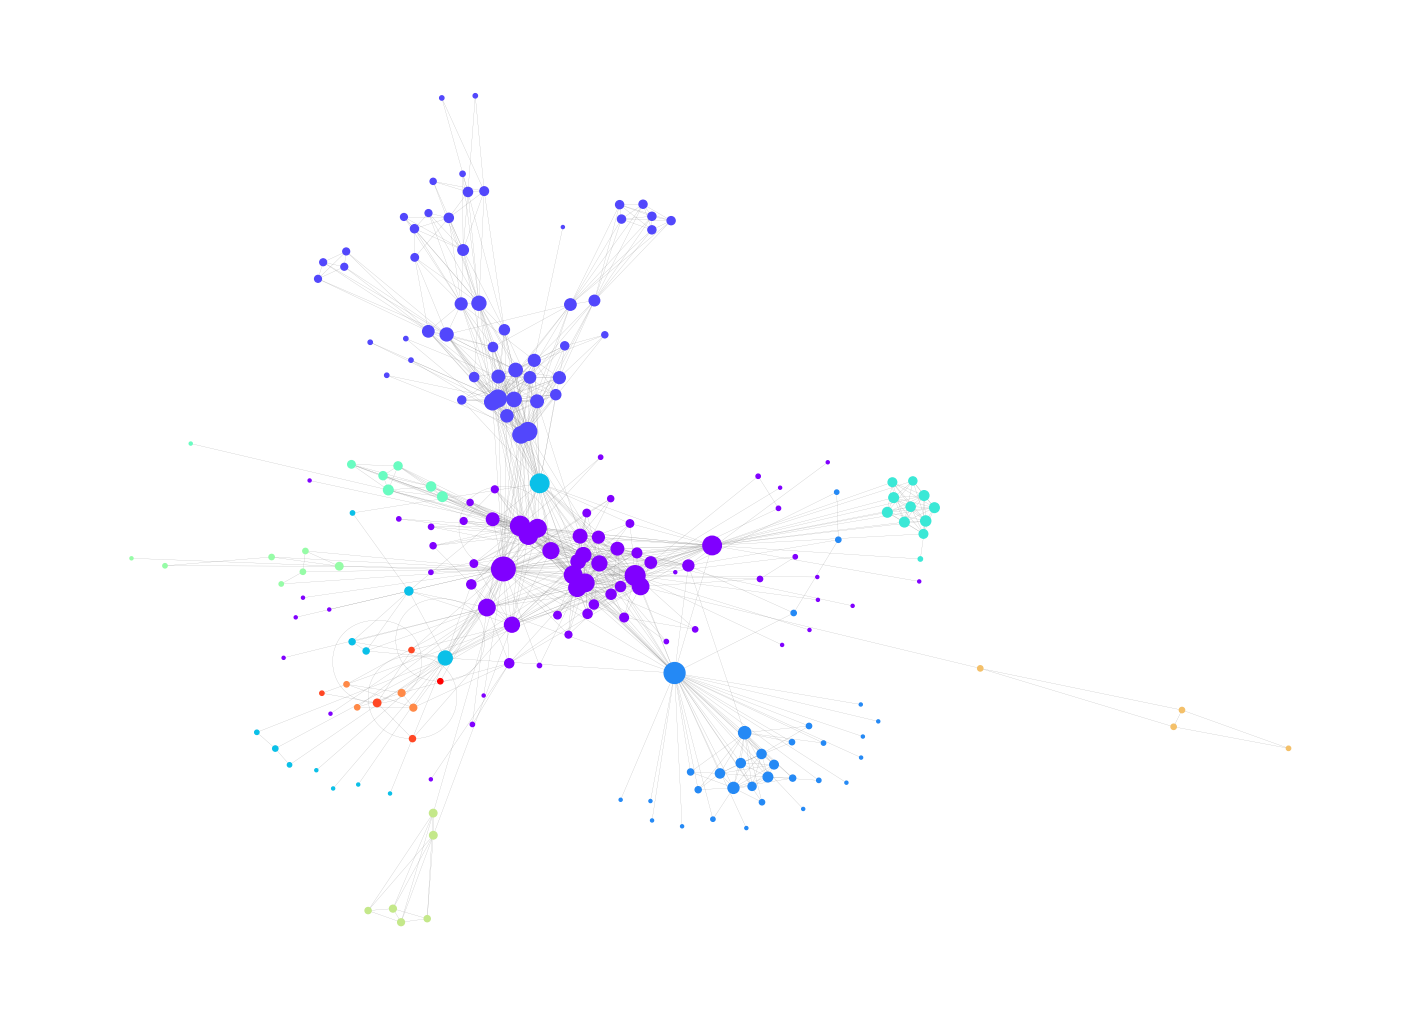

In [75]:
# Plot the graph
plot_community_graph(largest_cc_50plus_graph, communities)

In [76]:
# Asynchronous fluid communities
# Calculate the communities
communities = list(community.asyn_fluidc(largest_cc_50plus_graph, k=7))
# Calculate the modularity score
modularity_score = community.modularity(largest_cc_50plus_graph, communities)
print('Modularity score:', modularity_score)
# Calculate the number of communities
n_communities = len(communities)
print('Number of communities:', n_communities)

Modularity score: 0.5441018531290046
Number of communities: 7


> [NOTE]
> Modularity score changes every time you run the code because the community detection algorithms in NetworkX, including the asyn_fluidc function, are often non-deterministic. This means that the output of the algorithm can vary depending on the starting conditions, even if the input graph and parameters are unchanged.
> Additionally, many community detection algorithms, including the asyn_fluidc function, are optimized to maximize the modularity score, which means that small changes in the starting conditions or the optimization process can lead to different final solutions and different modularity scores.
> If you want to get consistent results, you can run the algorithm multiple times and take the average of the modularity scores. You can also try to use different community detection algorithms and compare their results to determine which one gives you the most satisfying split.

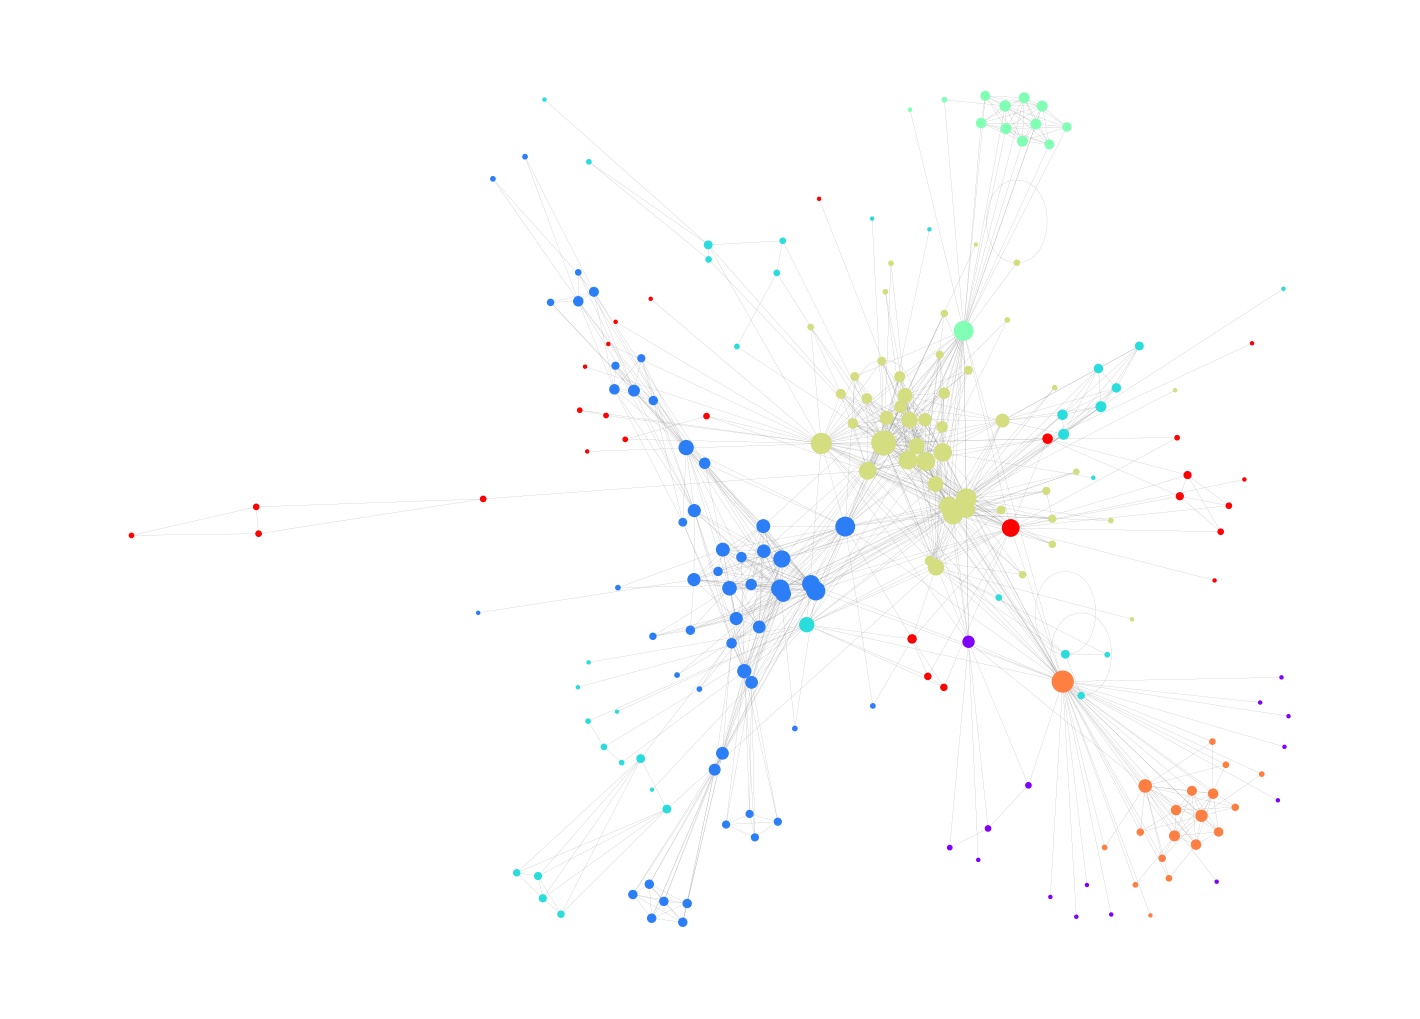

In [77]:
# Plot the graph
plot_community_graph(largest_cc_50plus_graph, communities)

In [78]:
# Label propagation
# Calculate the communities
communities = list(community.label_propagation_communities(largest_cc_50plus_graph))
# Calculate the modularity score
modularity_score = community.modularity(largest_cc_50plus_graph, communities)
print('Modularity score:', modularity_score)
# Calculate the number of communities
n_communities = len(communities)
print('Number of communities:', n_communities)

Modularity score: 0.5539245332399638
Number of communities: 19


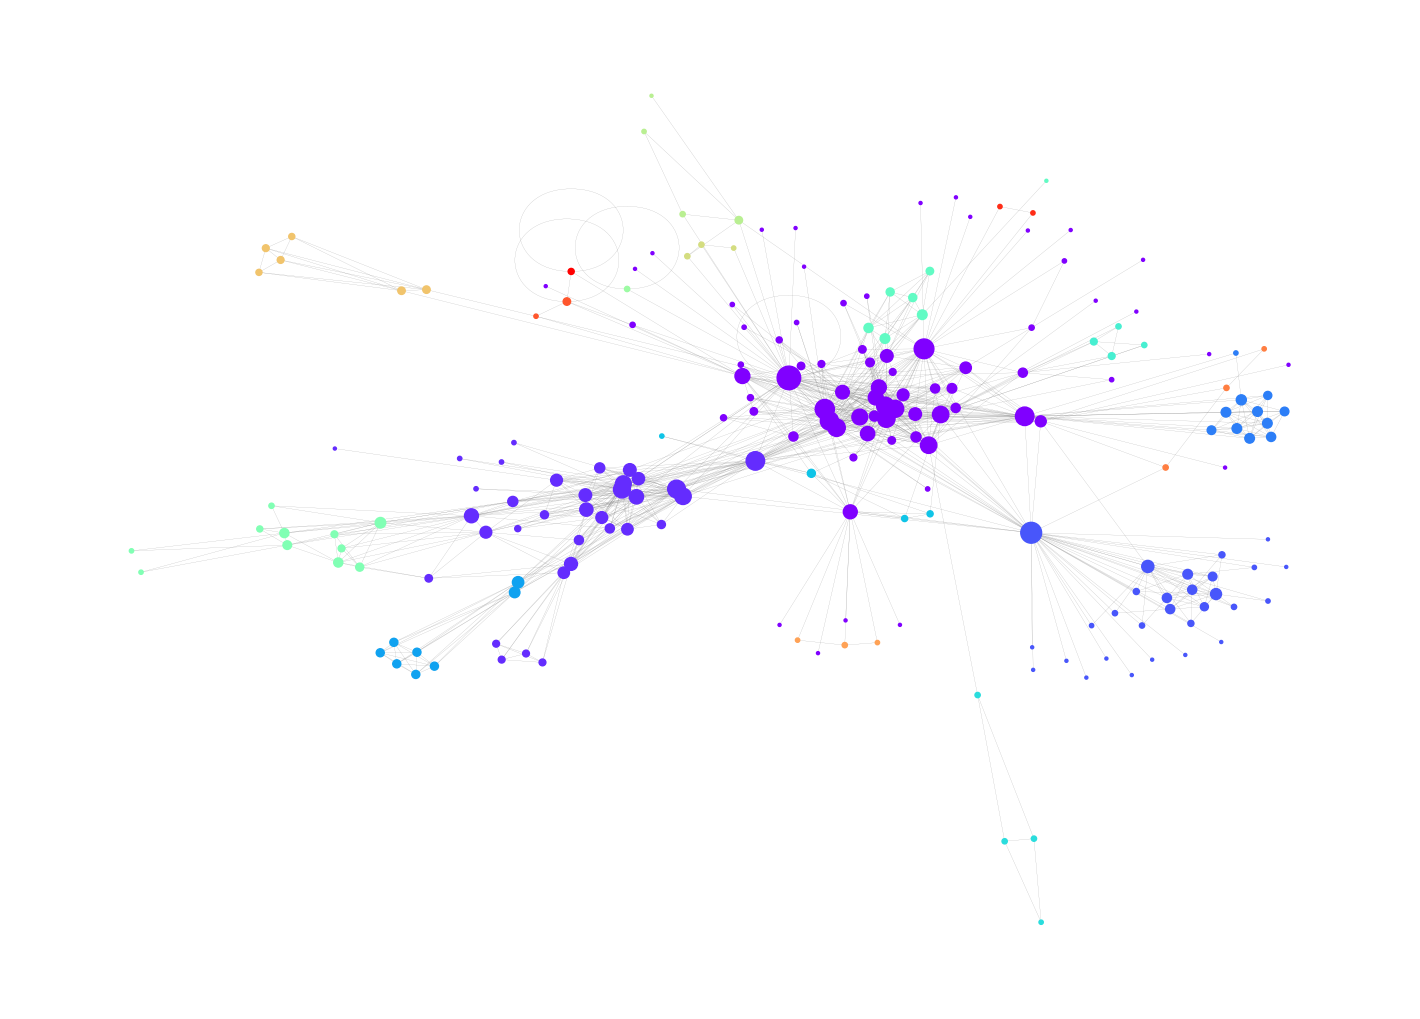

In [79]:
# Plot the graph
plot_community_graph(largest_cc_50plus_graph, communities)

**Question 4.** Your choice. (Use any tools you wish.)
(A) What is the distribution of the number of co-occurrences for each character in the largest connected component of Marvel-50plus graph? Can you visualize it using a histogram?

(B) Is there a relationship between the number of co-occurrences and other centrality measures such as degree centrality, betweenness centrality, closeness centrality, and eigenvector centrality? How can you test this relationship and what can you conclude from it?

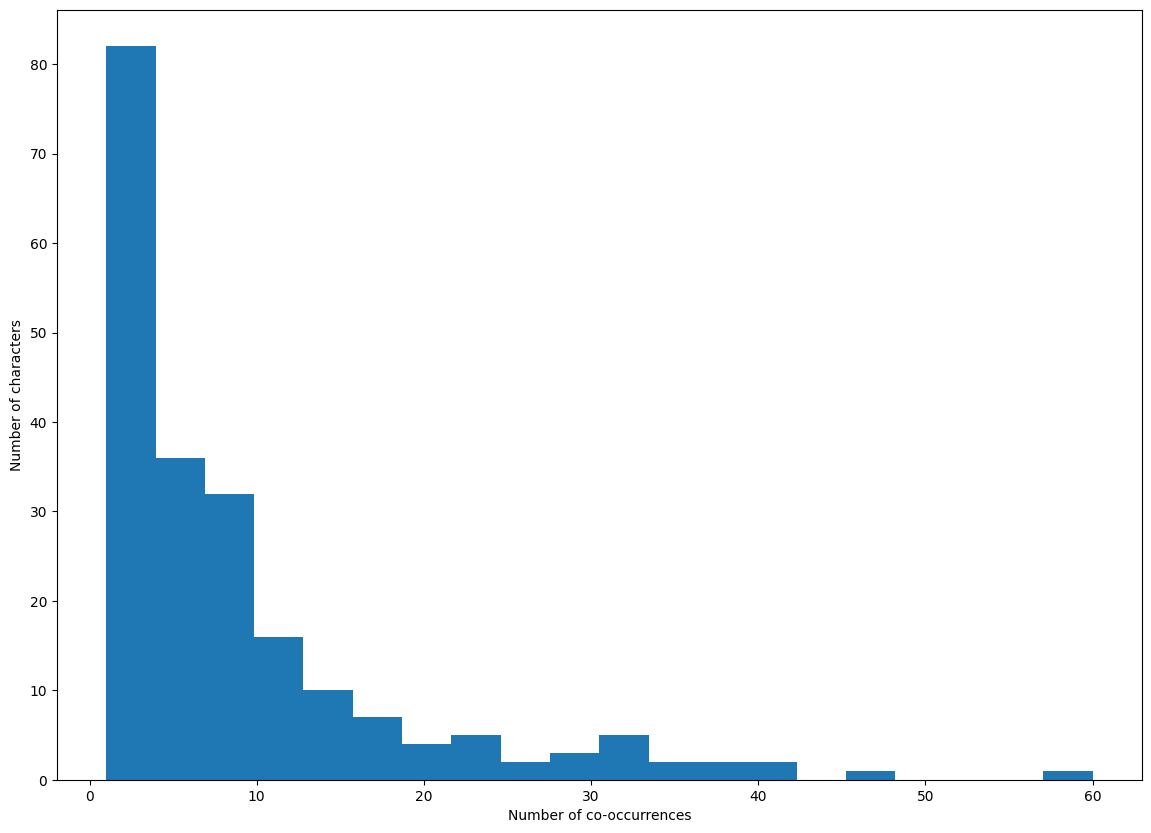

In [88]:
# Question 4
# What is the distribution of the number of co-occurrences for each character in the largest connected component of Marvel-50plus graph?
# Visualize it using a histogram
# Calculate the number of co-occurrences for each character
co_occurrences = dict(largest_cc_50plus_graph.degree())

# Create a list of the number of co-occurrences
co_occurrences_list = list(co_occurrences.values())

# Plot the histogram
plt.hist(co_occurrences_list, bins=20)
plt.xlabel('Number of co-occurrences')
plt.ylabel('Number of characters')
plt.show()


In [89]:
# Is there a relationship between the number of co-occurrences and other centrality measures such as degree centrality, betweenness centrality, closeness centrality, and eigenvector centrality?
# How can you test this relationship and what can you conclude from it?
# Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(largest_cc_50plus_graph)

# Calculate the betweenness centrality of each node
betweenness_centrality = nx.betweenness_centrality(largest_cc_50plus_graph)

# Calculate the closeness centrality of each node
closeness_centrality = nx.closeness_centrality(largest_cc_50plus_graph)

# Calculate the eigenvector centrality of each node
eigenvector_centrality = nx.eigenvector_centrality(largest_cc_50plus_graph)


In [90]:
# Create a dataframe with the centrality measures
centrality_df = pd.DataFrame([degree_centrality, betweenness_centrality, closeness_centrality, eigenvector_centrality]).T
centrality_df.columns = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'eigenvector_centrality']
centrality_df.head()

,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
AGATHA HARKNESS,0.014354,0.000000,0.337641,0.028004
HUMAN TORCH,0.172249,0.054374,0.500000,0.208761
INVISIBLE WOMAN,0.129187,0.016656,0.477169,0.182456
THING,0.191388,0.081668,0.504831,0.219767
ALICIA REIS MASTERS,0.023923,0.000000,0.338736,0.039067


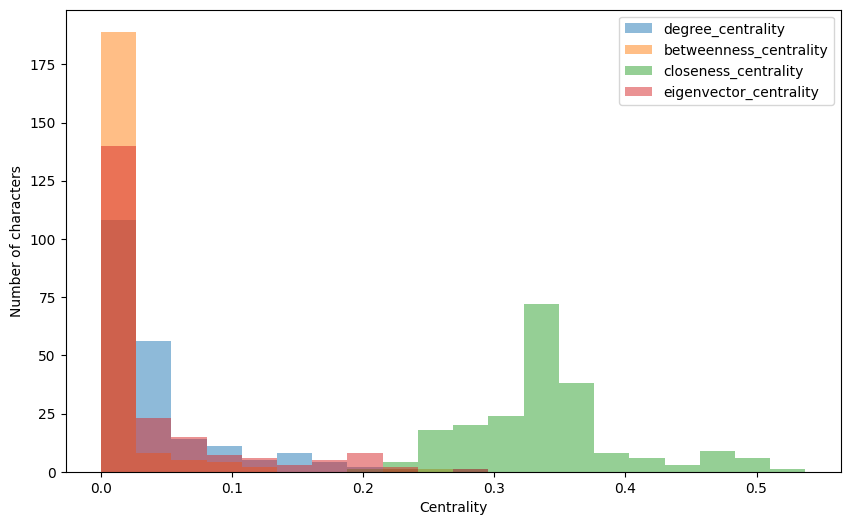

In [95]:
# Plot the centrality measures
centrality_df.plot(kind='hist', bins=20, alpha=0.5, figsize=(10, 6))
plt.xlabel('Centrality')
plt.ylabel('Number of characters')
plt.show()

**Question 5.**
What is the density 